In [67]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision.models import densenet121
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torchvision

In [68]:
class ModifiedCheXNet(nn.Module):
    def __init__(self, num_classes):
        super(ModifiedCheXNet, self).__init__()
        self.base_model = densenet121(pretrained=True)
        num_features = self.base_model.classifier.in_features
        self.base_model.classifier = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

In [69]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [70]:
model = ModifiedCheXNet(num_classes=9)
model.load_state_dict(torch.load('model3.pth'))
model.eval()

/Users/vrajrajpura/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vrajrajpura/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ModifiedCheXNet(
  (base_model): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, m

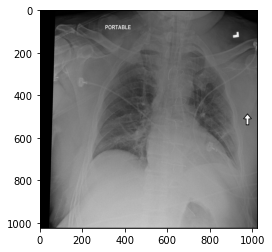

In [71]:
image_path = '../demo_images/00000175_001_atelectasis.png'
image = Image.open(image_path).convert('RGB')
op = image
image = transform(image).unsqueeze(0)

plt.imshow(op.resize((op.size[1], op.size[1])))
plt.show()


In [72]:
with torch.no_grad():
    output = model(image)
    _, predicted3 = torch.max(output, 1)

In [73]:
if predicted3.item() == 0:
    print("Atelectasis")
elif predicted3.item() == 1:
    print("Consolidation")
elif predicted3.item() == 2:
    print("Infiltration")
elif predicted3.item() == 3:
    print("Pneumothorax")
elif predicted3.item() == 4:
    print("Edema")
elif predicted3.item() == 5:
    print("Emphysema")
elif predicted3.item() == 6:
    print("Fibrosis")
elif predicted3.item() == 7:
    print("Nodule")
elif predicted3.item() == 8:
    print("Mass")
else:
    print("None of them")

Atelectasis
